# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_sparc4acs2_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_s4c2_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_s4c2_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:49.065000,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:50.185073,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:51.305146,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:52.425219,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:53.545291,0.00001,0,0,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:55:22.403000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,14,L4,None,True
2499,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:57:05.009000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,15,L4,None,True
2500,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:58:47.613000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,16,L4,None,True
2501,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T08:00:30.412000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   103R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   103R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   103R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   103R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   103R x 13C   [I11, D2

Then we plot the science frame using the `sparc4.product_plots` library

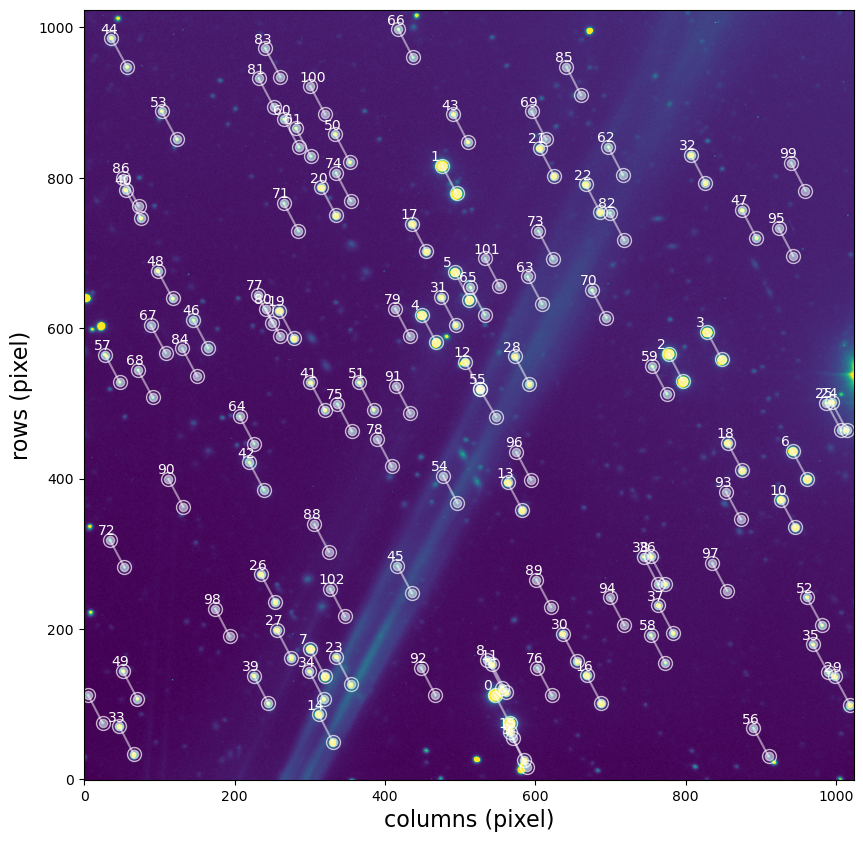

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553081,-38.759765,565.672747,75.188764,5.155194,5.155194,-11.635257,0.000550,-9.430508,0.000533,10,0
1,1,189.564732,-38.693922,495.214601,779.374310,5.094005,5.094005,-11.233241,0.000685,-9.470621,0.000594,10,0
2,2,189.527397,-38.716351,796.440098,529.594876,5.168262,5.168262,-11.101612,0.000740,-9.470819,0.000661,10,0
3,3,189.521331,-38.713464,848.001933,558.366421,5.121048,5.121048,-10.490847,0.001053,-9.474367,0.000588,10,0
4,4,189.567093,-38.712647,468.050811,581.346630,5.124422,5.124422,-10.183789,0.001339,-9.463536,0.000998,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,189.598351,-38.750295,193.464214,190.182619,4.939724,4.939724,-5.472073,0.059539,-9.423908,0.000554,10,0
99,99,189.508983,-38.691924,959.277346,783.085153,4.830745,4.830745,-5.616613,0.053070,-9.482223,0.000500,10,0
100,100,189.586253,-38.684625,320.580301,884.175660,4.723864,4.723864,-5.443588,0.061928,-9.467888,0.000517,10,0
101,101,189.557312,-38.705314,552.254586,656.173006,4.936146,4.936146,-5.824251,0.048006,-9.479341,0.000838,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

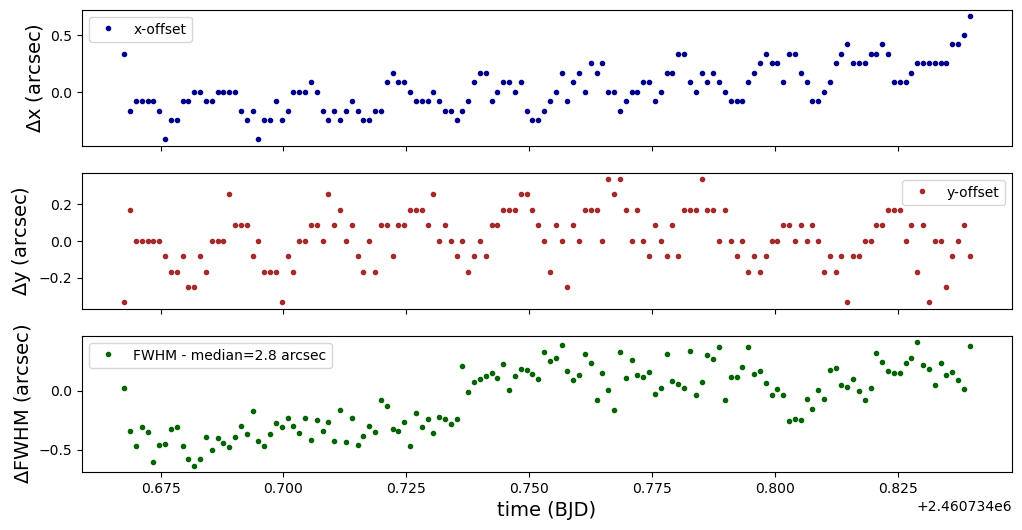

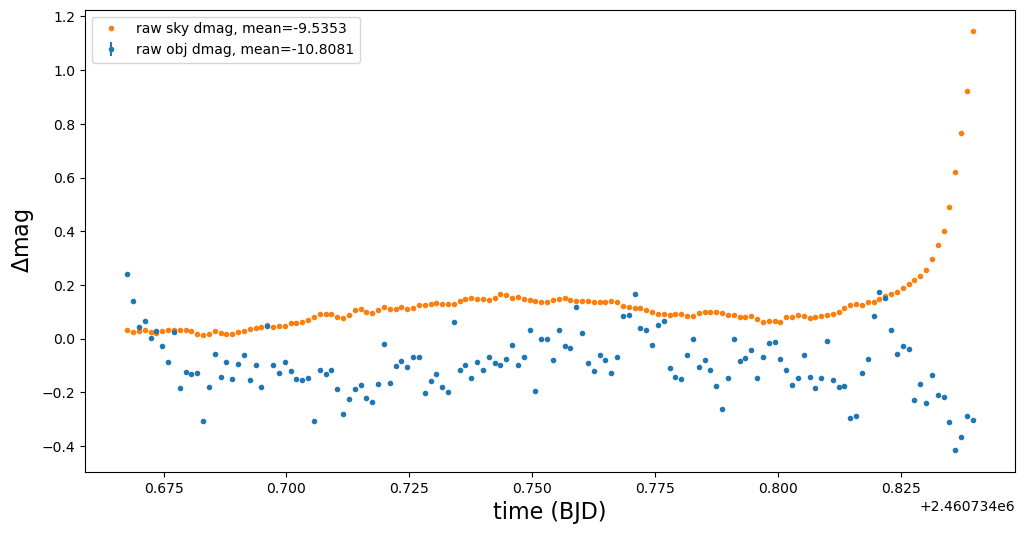

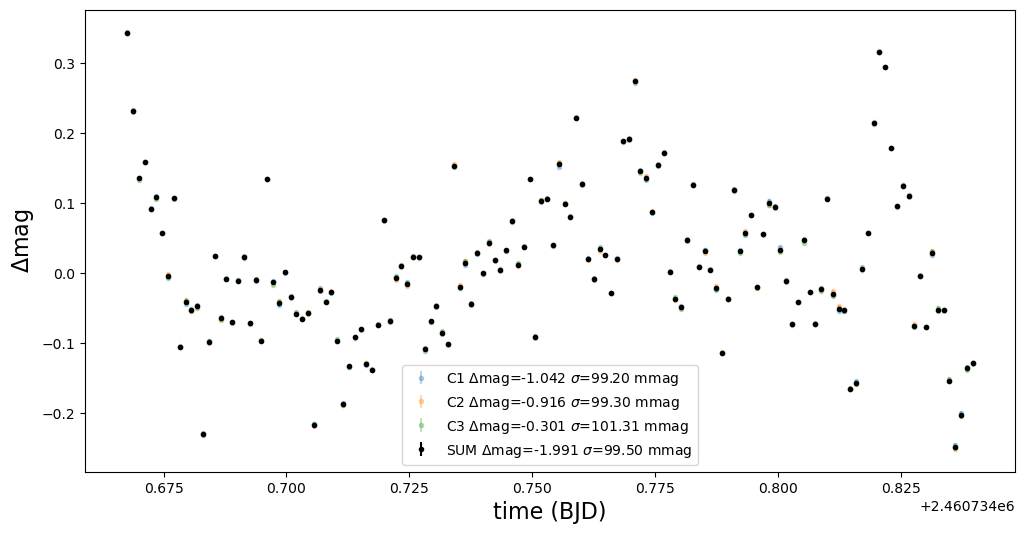

       TIME                x          ...       diffmagsum     
------------------ ------------------ ... ---------------------
 2460734.667597587 458.44556809323404 ...    0.3431430700645173
 2460734.668784965 456.94556809323404 ...   0.23131378038084627
 2460734.669971984 457.19556809323404 ...   0.13476630782044552
2460734.6711572777 457.19556809323404 ...    0.1584953775535194
 2460734.672347781 457.19556809323404 ...   0.09145314382596403
 2460734.673534742 457.19556809323404 ...   0.10754784453560617
 2460734.674720059 456.94556809323404 ...   0.05677403549399784
               ...                ... ...                   ...
2460734.8325558216 458.19556809323404 ... -0.053236700659477165
 2460734.833743406 458.19556809323404 ...  -0.05330580591687628
2460734.8349286756 458.19556809323404 ...  -0.15415305567159265
 2460734.836116318 458.69556809323404 ...  -0.24889270727139667
2460734.8373039374 458.69556809323404 ...  -0.20303332251392803
2460734.8384938138 458.94556809323404 ..

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     903   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1250   103R x 619C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D,

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0143', 'EFE0143', 'FO0144', 'EFO0144', 'FE0144', 'EFE0144', 'FO0145',
       'EFO0145', 'FE0145', 'EFE0145'],
      dtype='object', length=619)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:42:46,008 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:42:46,008 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:42:46,020 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 00:42:46,020 | INFO | Source index: i=4 


2025-09-18 00:42:46,021 root - INFO - Source RA=189.56709331273981 Dec=-38.7126474515574 mag=-16.2478+-0.0002  [pipeline_lib]


2025-09-18 00:42:46,021 | INFO | Source RA=189.56709331273981 Dec=-38.7126474515574 mag=-16.2478+-0.0002


2025-09-18 00:42:46,022 root - INFO - Best aperture radius: 12.0 pixels  [pipeline_lib]


2025-09-18 00:42:46,022 | INFO | Best aperture radius: 12.0 pixels


2025-09-18 00:42:46,023 root - INFO - Polarization in Q: -0.0009+-0.0003  [pipeline_lib]


2025-09-18 00:42:46,023 | INFO | Polarization in Q: -0.0009+-0.0003


2025-09-18 00:42:46,024 root - INFO - Polarization in U: -0.0014+-0.0006  [pipeline_lib]


2025-09-18 00:42:46,024 | INFO | Polarization in U: -0.0014+-0.0006


2025-09-18 00:42:46,026 root - INFO - Polarization in V: 0.0001+-0.0003  [pipeline_lib]


2025-09-18 00:42:46,026 | INFO | Polarization in V: 0.0001+-0.0003


2025-09-18 00:42:46,026 root - INFO - Total linear polarization p: 0.0016+-0.0005  [pipeline_lib]


2025-09-18 00:42:46,026 | INFO | Total linear polarization p: 0.0016+-0.0005


2025-09-18 00:42:46,028 root - INFO - Angle of polarization theta: 119+-9 deg  [pipeline_lib]


2025-09-18 00:42:46,028 | INFO | Angle of polarization theta: 119+-9 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:42:46,029 root - INFO - Free constant k: 1.1997727241916236+-0.0  [pipeline_lib]


2025-09-18 00:42:46,029 | INFO | Free constant k: 1.1997727241916236+-0.0


2025-09-18 00:42:46,030 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 00:42:46,030 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 00:42:46,031 root - INFO - RMS of zi residuals: 0.0025500173497975463  [pipeline_lib]


2025-09-18 00:42:46,031 | INFO | RMS of zi residuals: 0.0025500173497975463


2025-09-18 00:42:46,032 root - INFO - Reduced chi-square (n=146.0, DOF=143.0): 2.14  [pipeline_lib]


2025-09-18 00:42:46,032 | INFO | Reduced chi-square (n=146.0, DOF=143.0): 2.14


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:42:46,114 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:42:46,114 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:42:46,120 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:42:46,120 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:42:46,336 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:42:46,336 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:42:46,341 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:42:46,341 | INFO | Substituting symbol \perp from STIXGeneral


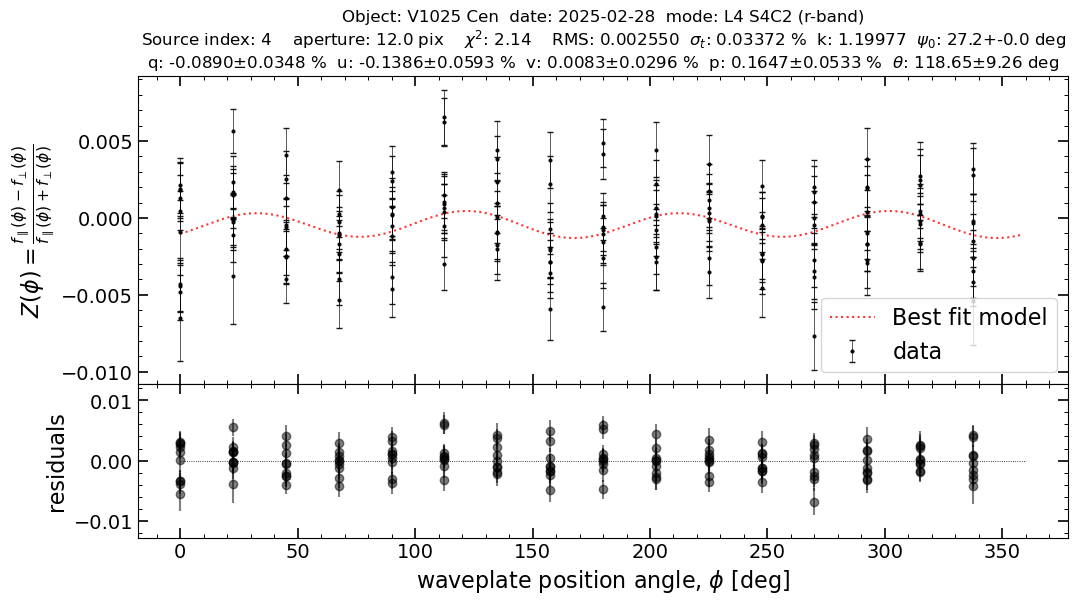

In [11]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs2/20250227_s4c2_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 4
APERTURE_RADIUS : 12.0
NEXPS : 146
MAG : -16.2478+-0.0002
RA : 189.56709331273981
DEC : -38.7126474515574
FWHM : 5.775228697687867
X1 : 448.840325275098
Y1 : 617.810292274116
X2 : 468.0508109113701
Y2 : 581.3466304896847
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.16+-0.05 %  Angle of polarization: 119+-9 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

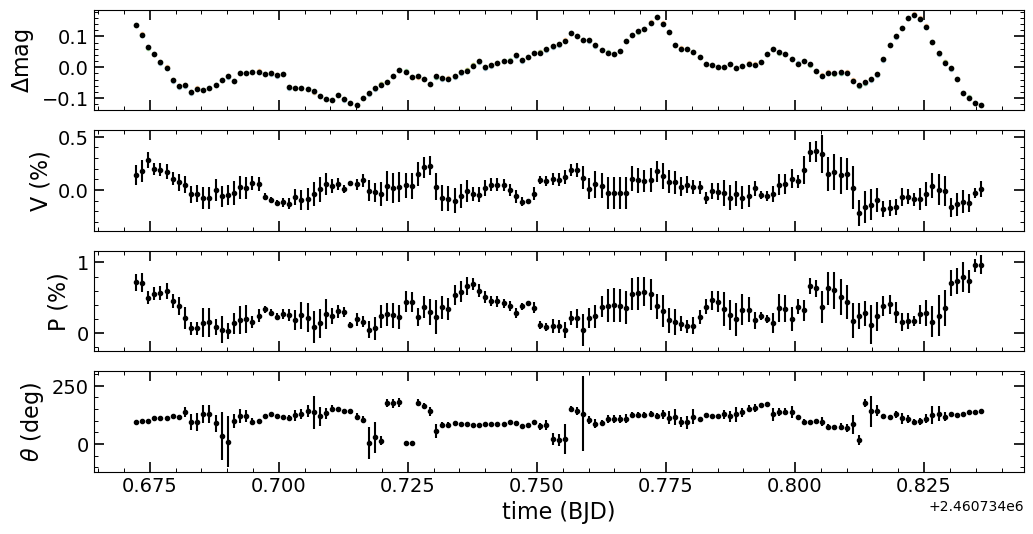

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.13778692597901632,0.0005569987185337235,0.13830045546448844,0.0005685673492792884,0.1365599453886155,0.0006631371306119868,2460734.672330157,448.840325275098,617.810292274116,468.0508109113701,581.3466304896847,4.951662721055769,-13.220837801051005,0.0004997211670940223,-15.06757493362265,0.0005693009068898016,0.13785377503590368,0.0071649730358022915,0.001196491717304058,94.62242005453876,4.775965372640701
0.10551987854244516,0.0005676539959903731,0.10636961575205284,0.0005789171941960557,0.10469649908485934,0.0006713888748653141,2460734.6735169673,447.340325275098,619.310292274116,466.5508109113701,582.8466304896847,4.951662721055769,-13.19125208312943,0.0005117757723042861,-15.070046127739996,0.0005677991500871054,0.10579686299698388,0.007151510287976346,0.0013173618975242183,97.98167797031884,5.268334764551382
0.06414493329129378,0.0005821727056332305,0.06526952793795893,0.000593260206475095,0.06377706833168872,0.000684073216030957,2460734.67470497,447.590325275098,618.810292274116,466.8008109113701,582.3466304896847,4.951662721055769,-13.151663179010146,0.0005280571637114426,-15.071633887063678,0.000567719818415039,0.06462019955401743,0.004994256590064627,0.0009119776105792049,97.48338717893058,5.222510936753401
0.04202342215923416,0.0005902220754051784,0.04380720268867755,0.0006011996968817417,0.042480388068174335,0.0006908966034113472,2460734.675890258,447.590325275098,618.810292274116,466.8008109113701,582.3466304896847,4.951662721055769,-13.131276435014856,0.0005369966094767493,-15.072949722077665,0.0005674902771528843,0.04291762054474013,0.005559922655711515,0.0009142170714849329,112.07996211048463,4.702692800521169
0.01508651710997988,0.0005999970587307962,0.01686442466350968,0.0006108083167786536,0.015974250830256054,0.0006989035636225605,2460734.677080466,447.590325275098,618.810292274116,466.8008109113701,582.3466304896847,4.8471052123073175,-13.106180645942924,0.0005478271475012135,-15.07470211095363,0.0005667501309730277,0.01606944259684262,0.005739356826078648,0.0009822493023958667,111.21444242552008,4.894682609883233
-0.0023402122502034217,0.0006065382020490676,-0.000630307519907447,0.0006173629229082969,-0.001766585799293452,0.0007043151599311612,2460734.6782679423,447.590325275098,618.810292274116,466.8008109113701,582.3466304896847,4.832207421793093,-13.089798806679413,0.0005550838257139143,-15.075838539078376,0.0005663313985009684,-0.0014488247914137276,0.005921149345734065,0.001148118113327243,113.63331183509568,5.545575043604704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.014098753072909531,0.0006883464530468331,0.01629374977973086,0.0007019350703100535,0.015616186841397095,0.0008036629233186225,2460734.828982522,448.090325275098,619.310292274116,467.3008109113701,582.8466304896847,6.192701817796236,-13.032011691989272,0.0006317660720043136,-15.00123319104543,0.0006442225294594183,0.015369408551391572,0.0035917330248081015,0.0025201048996768777,117.43568658220855,20.066914671256647
-0.00454836662455449,0.0007063274377160752,-0.002517684392852715,0.0007200426467057008,-0.002919458811039277,0.0008218143632670399,2460734.830168955,448.090325275098,619.310292274116,467.3008109113701,582.8466304896847,6.251585240715368,-13.01158819044809,0.0006502989751289159,-14.99949431317611,0.0006512084450130862,-0.0033152151204696167,0.0070978173158913515,0.001837477704798938,128.77117996416064,7.403946878090383


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)